In [2]:
model_version = '35'
import pandas as pd

In [2]:
df.head()

,Image_name,Person_only,Truck_only,Both
0,0006916.jpg,0,0,0
1,2018-05-09_6-54-11-624231_leftImg8bit.jpg,0,0,0
2,0005310.jpg,0,0,0
3,2018-05-14_14-2-28-131645_leftImg8bit.jpg,0,0,0
4,0005879.jpg,0,0,0


## Load necessary modules

In [3]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
from tqdm import tqdm

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

Using TensorFlow backend.


## Load RetinaNet model

In [5]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases

model_path = os.path.join('', 'inferences', 'model_{}.h5'.format(model_version))

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'car',
 1: 'bus',
 2: 'autorickshaw',
 3: 'vehicle fallback',
 4: 'truck',
 5: 'motorcycle',
 6: 'rider',
 7: 'person',
 8: 'bicycle',
 9: 'animal',
 10: 'traffic sign',
 11: 'train',
 12: 'trailer',
 13: 'traffic light',
 14: 'caravan'}

Instructions for updating:
Colocations handled automatically by placer.


/opt/miniconda3/envs/retina/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Run detection on example

In [6]:
def detect(image, model, threshold):
    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    labels = labels[0, scores[0]>threshold]
    return labels

In [7]:
THRESHOLD = 0.45

# load image
start = time.time()
for i, img in tqdm(enumerate(list(df.Image_name))):
    image = read_image_bgr('/home/ujjwal/Projects/Intel-Hackathon/data/JPEGImages/{}'.format(img))
    labels = detect(image, model, THRESHOLD)
    if (4 in labels) and (7 in labels or 6 in labels):
        df.iloc[i, 1:] = 1
    elif 7 in labels or 6 in labels:
        df.iloc[i, 1] = 1
    elif 4 in labels:
        df.iloc[i, 2] = 1

print("Processing Time : ", time.time() - start)

df.to_excel('/home/ujjwal/Projects/Intel-Hackathon/submissions/sub.xlsx', index=False)
print("\nsubmission file created!")

100it [08:52,  6.59s/it]

Processing Time :  532.3225293159485

submission file created!


In [8]:
df.head()

,Image_name,Person_only,Truck_only,Both
0,0006916.jpg,1,1,1
1,2018-05-09_6-54-11-624231_leftImg8bit.jpg,1,1,1
2,0005310.jpg,1,0,0
3,2018-05-14_14-2-28-131645_leftImg8bit.jpg,1,1,1
4,0005879.jpg,1,1,1


car 0.992
car 0.991
bus 0.967
car 0.964
car 0.961
autorickshaw 0.958
traffic sign 0.954
bus 0.918
car 0.883
bus 0.833
truck 0.829
car 0.810
traffic sign 0.658
truck 0.634
rider 0.598
bus 0.597
car 0.566
bus 0.532


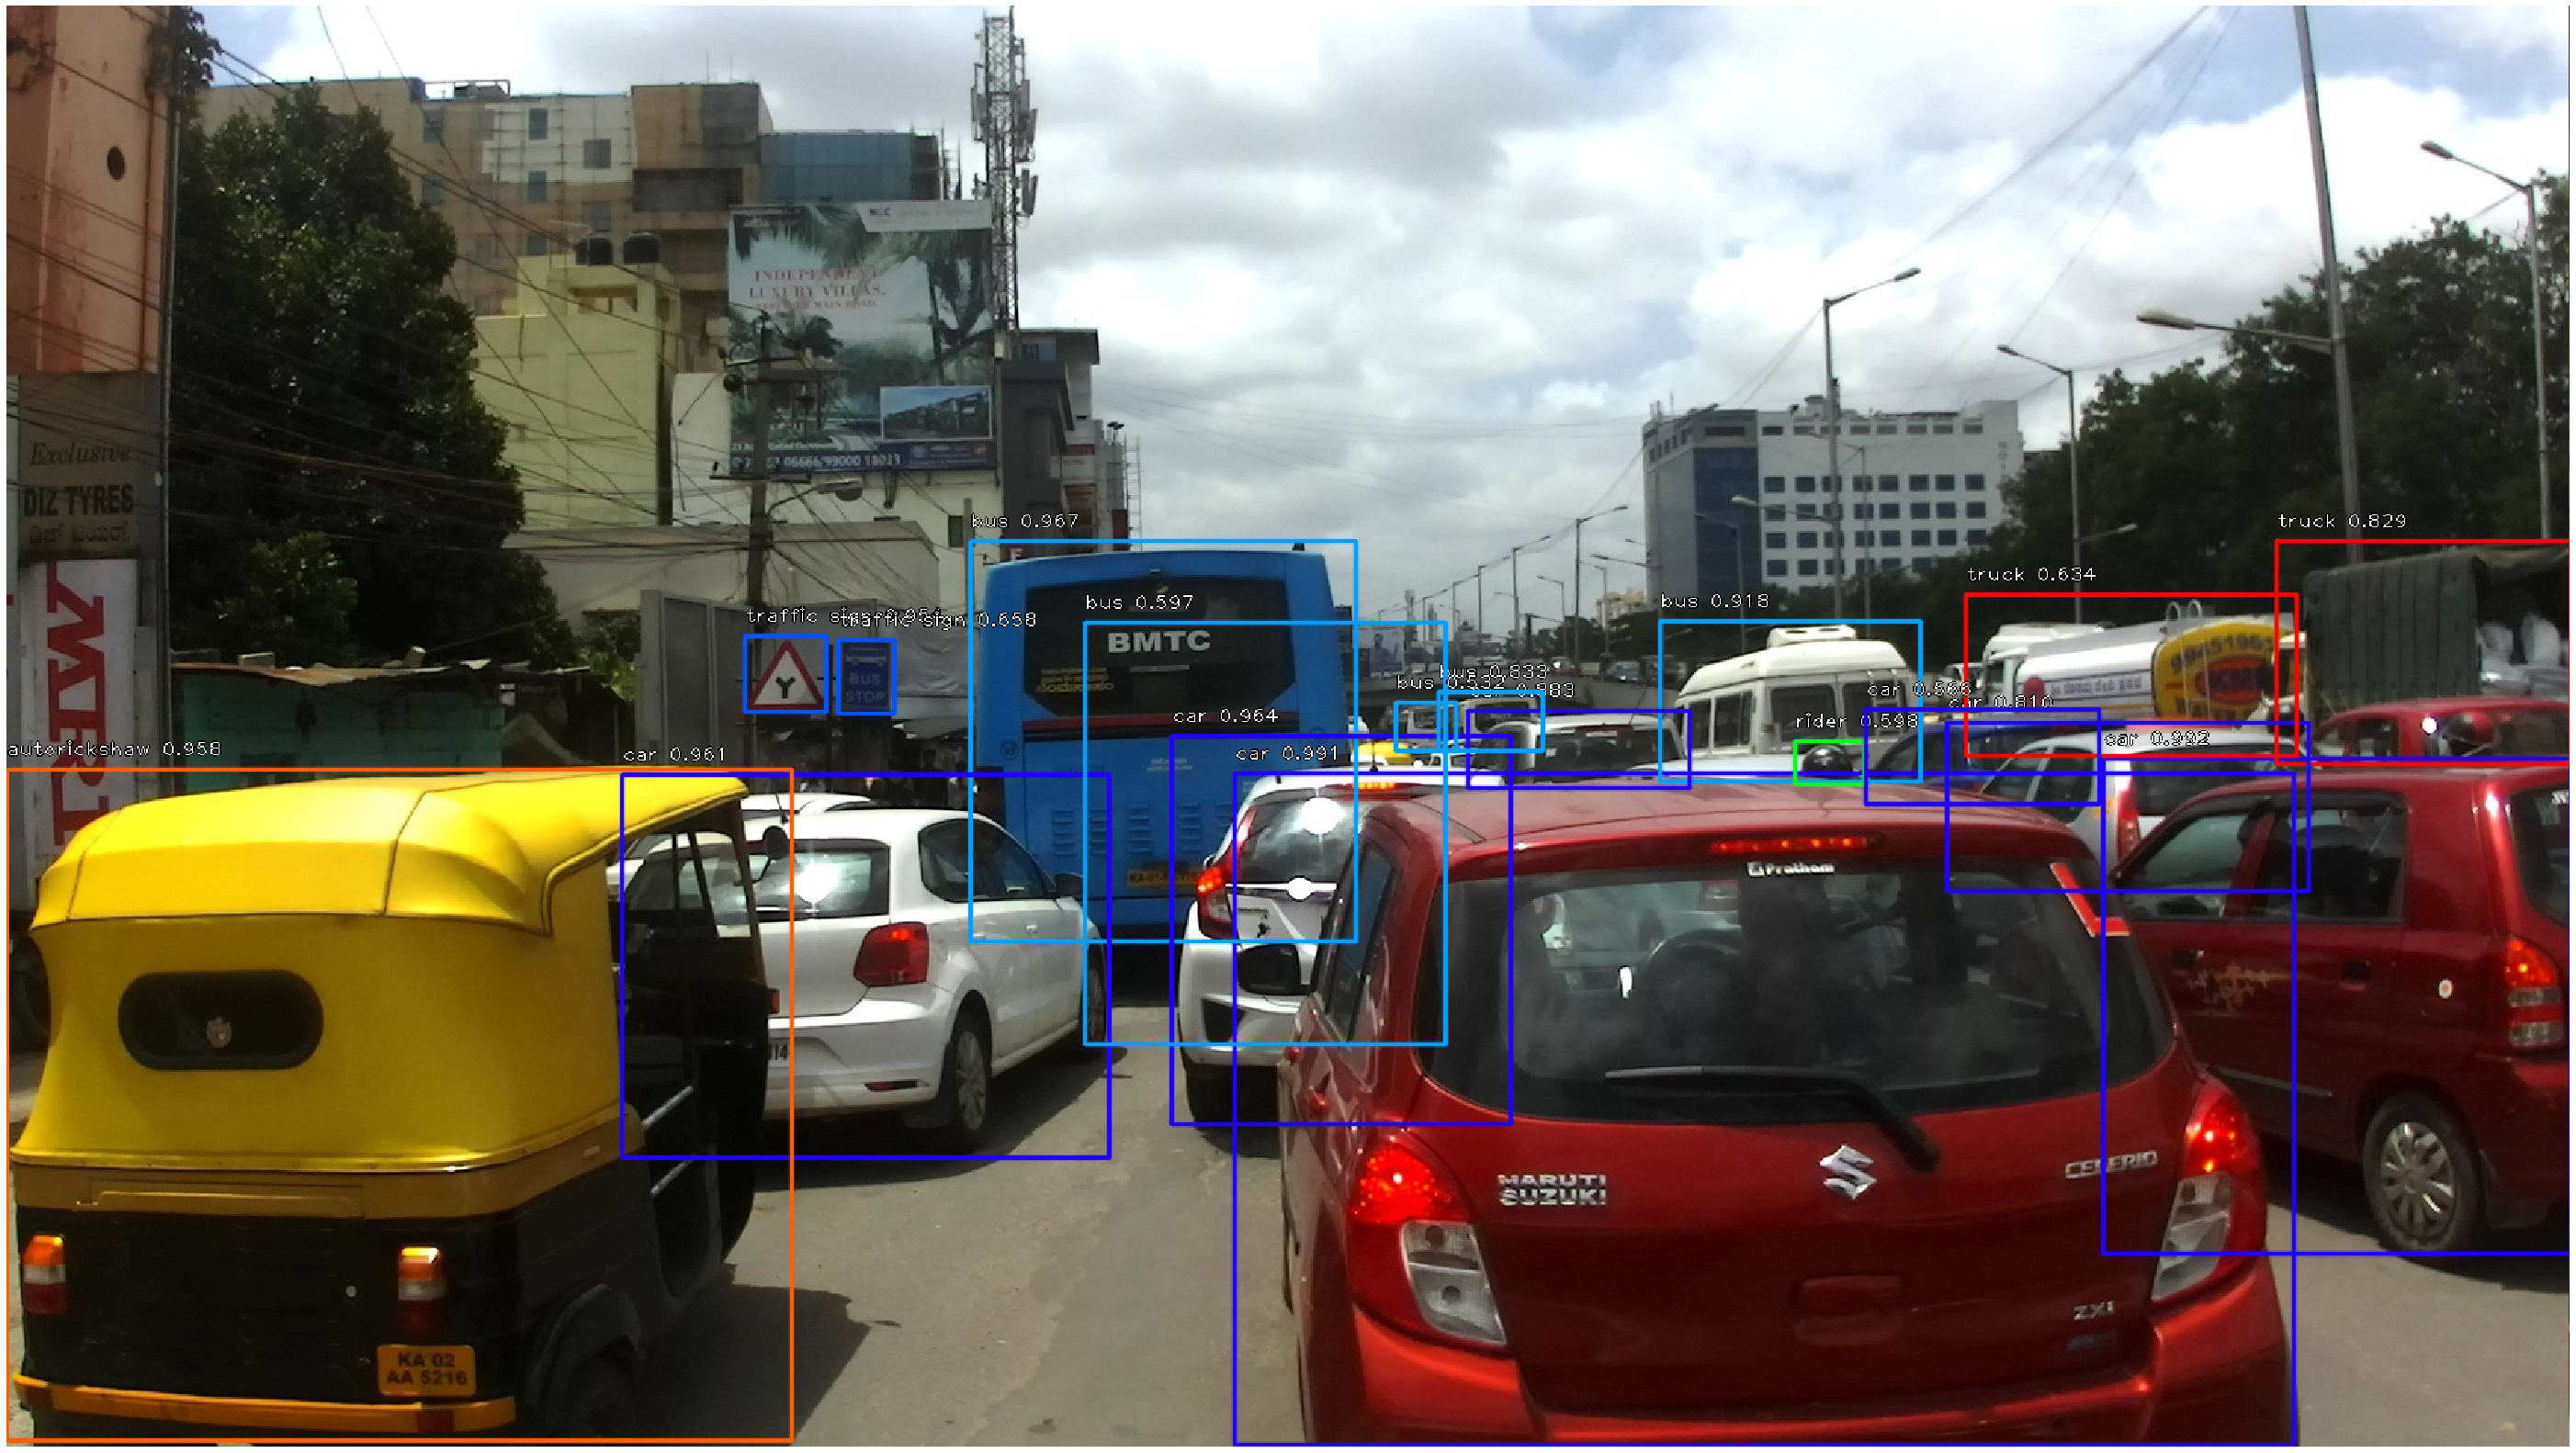

In [8]:
img_name = '0000009.jpg'
# load image
image = read_image_bgr('/home/ujjwal/Projects/Intel-Hackathon/data/JPEGImages/{}'.format(img_name))

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

# correct for image scale
boxes /= scale


# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
#     if labels_to_names[label] == 'truck':
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    print(caption)
    
plt.figure(figsize=(50, 50))
plt.axis('off')
plt.imshow(draw)
plt.savefig('/home/ujjwal/Projects/Intel-Hackathon/data/check/{}_{}.png'.format(img_name.split('.')[0], model_version), bbox_inches='tight')
plt.show()

In [ ]:
for i in range(labels.shape[1]):
    if labels[0, i] != -1 and scores[0,i]>THRESHOLD:
        if labels_to_names[labels[0, i]] == 'truck':
            if scores[i]
        print(labels_to_names[labels[0, i]], " : ", scores[0,i])

In [ ]:
print(scores[0, scores[0]>THRESHOLD])

In [ ]:
# import os, subprocess
# for img in tqdm(img_list):
#     src = '/home/ujjwal/Projects/Intel-Hackathon/data/JPEGImages/{}'.format(img)
#     dst = '/home/ujjwal/Projects/Intel-Hackathon/data/Test/{}'.format(img)
#     cmd = 'cp {} {}'.format(src, dst)

#     status = subprocess.call(cmd, shell=True)

#     if status != 0:
#         if status < 0:
#              print("Killed by signal", status)
#         else:
#              print("Command failed with return code - ", status)
#     else:
#          print('Execution of %s passed!\n' % cmd)